# Day_077

### 練習時間
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras
from keras.layers import Input, Dense, Dropout, Activation, Flatten
from keras.models import Model, Sequential

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
x_train, y_train = train
x_test, y_test = test
x_train = x_train / 255.
x_test = x_test / 255.

# Flatten the images
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# Convert y to onehot
y_train = keras.utils.to_categorical(y_train, num_classes = 10)
y_test = keras.utils.to_categorical(y_test, num_classes = 10)

In [4]:
def build_mlp():
    """
    My own model
    """
    input_layer = Input([x_train.shape[-1]])
    
    # 堆疊多個全連接網路層
    x = Dense(units = 512, activation = "relu")(input_layer)
    x = Dense(units = 256, activation = "relu")(x)
    x = Dense(units = 128, activation = "relu")(x)
    
    output_layer = Dense(units = 10, activation="softmax")(x)
    
    model = Model(inputs=[input_layer], outputs = [output_layer])
    return model

In [5]:
model = build_mlp()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [6]:
"""
Compile my model
"""
optimizer = keras.optimizers.SGD(lr = 0.001)
model.compile(loss = "categorical_crossentropy", metrics=["accuracy"], optimizer = optimizer)

In [7]:
"""
Set epochs
"""
model.fit(x_train, y_train, 
          epochs = 500, 
          batch_size = 256, 
          validation_data = (x_test, y_test), 
          shuffle = True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 18s 356us/step - loss: 2.2641 - acc: 0.1535 - val_loss: 2.2181 - val_acc: 0.2004
Epoch 2/500
50000/50000 [==============================] - 17s 348us/step - loss: 2.1878 - acc: 0.2246 - val_loss: 2.1569 - val_acc: 0.2438
Epoch 3/500
50000/50000 [==============================] - 17s 344us/step - loss: 2.1313 - acc: 0.2533 - val_loss: 2.1047 - val_acc: 0.2607
Epoch 4/500
50000/50000 [==============================] - 17s 346us/step - loss: 2.0836 - acc: 0.2691 - val_loss: 2.0617 - val_acc: 0.2753
Epoch 5/500
50000/50000 [==============================] - 16s 325us/step - loss: 2.0443 - acc: 0.2835 - val_loss: 2.0260 - val_acc: 0.2912
Epoch 6/500
50000/50000 [==============================] - 16s 313us/step - loss: 2.0118 - acc: 0.2951 - val_loss: 1.9967 - val_acc: 0.3017
Epoch 7/500
50000/50000 [==============================] - 17s 331us/step - loss: 1.9852 - acc: 0.3051 - val_l

Epoch 59/500
50000/50000 [==============================] - 16s 321us/step - loss: 1.6451 - acc: 0.4272 - val_loss: 1.6535 - val_acc: 0.4233
Epoch 60/500
50000/50000 [==============================] - 16s 327us/step - loss: 1.6417 - acc: 0.4285 - val_loss: 1.6491 - val_acc: 0.4267
Epoch 61/500
50000/50000 [==============================] - 17s 349us/step - loss: 1.6386 - acc: 0.4309 - val_loss: 1.6463 - val_acc: 0.4262
Epoch 62/500
50000/50000 [==============================] - 17s 343us/step - loss: 1.6356 - acc: 0.4310 - val_loss: 1.6449 - val_acc: 0.4268
Epoch 63/500
50000/50000 [==============================] - 17s 339us/step - loss: 1.6326 - acc: 0.4321 - val_loss: 1.6427 - val_acc: 0.4297
Epoch 64/500
50000/50000 [==============================] - 18s 354us/step - loss: 1.6299 - acc: 0.4328 - val_loss: 1.6390 - val_acc: 0.4296
Epoch 65/500
50000/50000 [==============================] - 17s 345us/step - loss: 1.6267 - acc: 0.4335 - val_loss: 1.6354 - val_acc: 0.4329
Epoch 66/500


Epoch 117/500
50000/50000 [==============================] - 25s 501us/step - loss: 1.5047 - acc: 0.4766 - val_loss: 1.5317 - val_acc: 0.4658
Epoch 118/500
50000/50000 [==============================] - 25s 508us/step - loss: 1.5029 - acc: 0.4770 - val_loss: 1.5319 - val_acc: 0.4673
Epoch 119/500
50000/50000 [==============================] - 27s 538us/step - loss: 1.5010 - acc: 0.4782 - val_loss: 1.5287 - val_acc: 0.4663
Epoch 120/500
50000/50000 [==============================] - 25s 507us/step - loss: 1.4989 - acc: 0.4791 - val_loss: 1.5337 - val_acc: 0.4574
Epoch 121/500
50000/50000 [==============================] - 25s 507us/step - loss: 1.4975 - acc: 0.4798 - val_loss: 1.5365 - val_acc: 0.4643
Epoch 122/500
50000/50000 [==============================] - 25s 506us/step - loss: 1.4954 - acc: 0.4806 - val_loss: 1.5249 - val_acc: 0.4684
Epoch 123/500
50000/50000 [==============================] - 25s 503us/step - loss: 1.4937 - acc: 0.4807 - val_loss: 1.5228 - val_acc: 0.4709
Epoch 

Epoch 175/500
50000/50000 [==============================] - 22s 435us/step - loss: 1.4069 - acc: 0.5104 - val_loss: 1.4633 - val_acc: 0.4851
Epoch 176/500
50000/50000 [==============================] - 23s 462us/step - loss: 1.4060 - acc: 0.5095 - val_loss: 1.4688 - val_acc: 0.4823
Epoch 177/500
50000/50000 [==============================] - 21s 430us/step - loss: 1.4042 - acc: 0.5112 - val_loss: 1.4682 - val_acc: 0.4818
Epoch 178/500
50000/50000 [==============================] - 20s 392us/step - loss: 1.4026 - acc: 0.5122 - val_loss: 1.4599 - val_acc: 0.4837
Epoch 179/500
50000/50000 [==============================] - 19s 381us/step - loss: 1.4008 - acc: 0.5124 - val_loss: 1.4592 - val_acc: 0.4895
Epoch 180/500
50000/50000 [==============================] - 21s 414us/step - loss: 1.3997 - acc: 0.5126 - val_loss: 1.4602 - val_acc: 0.4868
Epoch 181/500
50000/50000 [==============================] - 21s 415us/step - loss: 1.3983 - acc: 0.5133 - val_loss: 1.4644 - val_acc: 0.4814
Epoch 

Epoch 233/500
50000/50000 [==============================] - 18s 355us/step - loss: 1.3253 - acc: 0.5363 - val_loss: 1.4246 - val_acc: 0.4982
Epoch 234/500
50000/50000 [==============================] - 18s 356us/step - loss: 1.3239 - acc: 0.5381 - val_loss: 1.4197 - val_acc: 0.4964
Epoch 235/500
50000/50000 [==============================] - 17s 346us/step - loss: 1.3229 - acc: 0.5388 - val_loss: 1.4113 - val_acc: 0.4999
Epoch 236/500
50000/50000 [==============================] - 17s 346us/step - loss: 1.3215 - acc: 0.5391 - val_loss: 1.4165 - val_acc: 0.4993
Epoch 237/500
50000/50000 [==============================] - 18s 354us/step - loss: 1.3206 - acc: 0.5397 - val_loss: 1.4122 - val_acc: 0.4992
Epoch 238/500
50000/50000 [==============================] - 18s 370us/step - loss: 1.3192 - acc: 0.5401 - val_loss: 1.4300 - val_acc: 0.4950
Epoch 239/500
50000/50000 [==============================] - 18s 361us/step - loss: 1.3175 - acc: 0.5409 - val_loss: 1.4257 - val_acc: 0.4949
Epoch 

C:\Users\User\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.178910). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 64s 1ms/step - loss: 1.3139 - acc: 0.5424 - val_loss: 1.4111 - val_acc: 0.5005
Epoch 243/500
50000/50000 [==============================] - 16s 319us/step - loss: 1.3120 - acc: 0.5426 - val_loss: 1.4139 - val_acc: 0.5017
Epoch 244/500
50000/50000 [==============================] - 18s 361us/step - loss: 1.3110 - acc: 0.5424 - val_loss: 1.4034 - val_acc: 0.5042
Epoch 245/500
50000/50000 [==============================] - 18s 367us/step - loss: 1.3091 - acc: 0.5432 - val_loss: 1.4086 - val_acc: 0.4975
Epoch 246/500
50000/50000 [==============================] - 19s 379us/step - loss: 1.3089 - acc: 0.5437 - val_loss: 1.4119 - val_acc: 0.4971
Epoch 247/500
50000/50000 [==============================] - 18s 364us/step - loss: 1.3064 - acc: 0.5448 - val_loss: 1.4127 - val_acc: 0.5022
Epoch 248/500
50000/50000 [==============================] - 17s 342us/step - loss: 1.3055 - acc: 0.5428 - val_loss: 1.4064 - val_acc: 0.4990
Epoch 249/500
50000/50

Epoch 300/500
50000/50000 [==============================] - 30s 607us/step - loss: 1.2425 - acc: 0.5664 - val_loss: 1.3834 - val_acc: 0.5117
Epoch 301/500
50000/50000 [==============================] - 31s 623us/step - loss: 1.2413 - acc: 0.5664 - val_loss: 1.3783 - val_acc: 0.5090
Epoch 302/500
50000/50000 [==============================] - 32s 632us/step - loss: 1.2400 - acc: 0.5656 - val_loss: 1.3706 - val_acc: 0.5138
Epoch 303/500
50000/50000 [==============================] - 31s 626us/step - loss: 1.2391 - acc: 0.5660 - val_loss: 1.3833 - val_acc: 0.5118
Epoch 304/500
50000/50000 [==============================] - 29s 581us/step - loss: 1.2378 - acc: 0.5677 - val_loss: 1.3765 - val_acc: 0.5111
Epoch 305/500
50000/50000 [==============================] - 29s 578us/step - loss: 1.2357 - acc: 0.5682 - val_loss: 1.3885 - val_acc: 0.5075
Epoch 306/500
50000/50000 [==============================] - 29s 590us/step - loss: 1.2354 - acc: 0.5682 - val_loss: 1.3763 - val_acc: 0.5133
Epoch 

Epoch 358/500
50000/50000 [==============================] - 28s 552us/step - loss: 1.1765 - acc: 0.5896 - val_loss: 1.3771 - val_acc: 0.5159
Epoch 359/500
50000/50000 [==============================] - 28s 555us/step - loss: 1.1761 - acc: 0.5899 - val_loss: 1.3552 - val_acc: 0.5241
Epoch 360/500
50000/50000 [==============================] - 27s 549us/step - loss: 1.1749 - acc: 0.5891 - val_loss: 1.3504 - val_acc: 0.5252
Epoch 361/500
50000/50000 [==============================] - 28s 557us/step - loss: 1.1726 - acc: 0.5900 - val_loss: 1.3812 - val_acc: 0.5128
Epoch 362/500
50000/50000 [==============================] - 28s 557us/step - loss: 1.1731 - acc: 0.5912 - val_loss: 1.3694 - val_acc: 0.5128
Epoch 363/500
50000/50000 [==============================] - 28s 562us/step - loss: 1.1719 - acc: 0.5904 - val_loss: 1.3602 - val_acc: 0.5198
Epoch 364/500
50000/50000 [==============================] - 28s 567us/step - loss: 1.1713 - acc: 0.5907 - val_loss: 1.3499 - val_acc: 0.5263
Epoch 

Epoch 416/500
50000/50000 [==============================] - 29s 578us/step - loss: 1.1152 - acc: 0.6100 - val_loss: 1.3745 - val_acc: 0.5175
Epoch 417/500
50000/50000 [==============================] - 28s 558us/step - loss: 1.1138 - acc: 0.6120 - val_loss: 1.3657 - val_acc: 0.5172
Epoch 418/500
50000/50000 [==============================] - 29s 573us/step - loss: 1.1125 - acc: 0.6113 - val_loss: 1.3363 - val_acc: 0.5288
Epoch 419/500
50000/50000 [==============================] - 28s 567us/step - loss: 1.1112 - acc: 0.6124 - val_loss: 1.3409 - val_acc: 0.5260
Epoch 420/500
50000/50000 [==============================] - 29s 576us/step - loss: 1.1117 - acc: 0.6121 - val_loss: 1.3460 - val_acc: 0.5259
Epoch 421/500
50000/50000 [==============================] - 28s 559us/step - loss: 1.1083 - acc: 0.6139 - val_loss: 1.3779 - val_acc: 0.5150
Epoch 422/500
50000/50000 [==============================] - 28s 557us/step - loss: 1.1086 - acc: 0.6134 - val_loss: 1.3577 - val_acc: 0.5218
Epoch 

Epoch 474/500
50000/50000 [==============================] - 29s 575us/step - loss: 1.0595 - acc: 0.6302 - val_loss: 1.3539 - val_acc: 0.5241
Epoch 475/500
50000/50000 [==============================] - 28s 570us/step - loss: 1.0546 - acc: 0.6322 - val_loss: 1.3878 - val_acc: 0.5110
Epoch 476/500
50000/50000 [==============================] - 29s 573us/step - loss: 1.0545 - acc: 0.6326 - val_loss: 1.3854 - val_acc: 0.5132
Epoch 477/500
50000/50000 [==============================] - 29s 580us/step - loss: 1.0539 - acc: 0.6323 - val_loss: 1.4020 - val_acc: 0.5102
Epoch 478/500
50000/50000 [==============================] - 29s 571us/step - loss: 1.0517 - acc: 0.6331 - val_loss: 1.3287 - val_acc: 0.5349
Epoch 479/500
50000/50000 [==============================] - 29s 570us/step - loss: 1.0497 - acc: 0.6348 - val_loss: 1.3964 - val_acc: 0.5097
Epoch 480/500
50000/50000 [==============================] - 29s 573us/step - loss: 1.0521 - acc: 0.6331 - val_loss: 1.3822 - val_acc: 0.5177
Epoch 

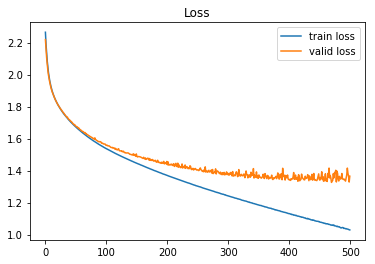

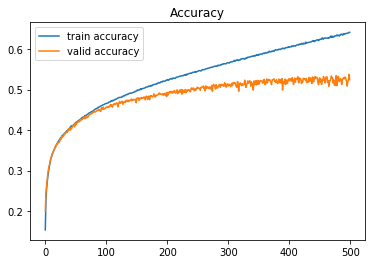

In [8]:
import matplotlib.pyplot as plt
"""
Get the training loss / validation loss / training accuracy / validation accuracy and plot them
"""
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()